In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si
data = np.loadtxt('/Users/ashwingirish/Documents/pyring/pyRing/gw150914_local_data_32s/Nested_sampler/posterior.dat', unpack=True)

In [2]:
print(data)
#[print(data[i][0]) for i in range(0,len(data))]

[[ 3.04985238e+00  8.27724644e-01  2.34237769e+00 ...  2.95726357e+00
   8.21730840e-01  2.26588362e+00]
 [-2.12963859e+01 -2.11389076e+01 -2.10994089e+01 ... -2.06784244e+01
  -2.06924025e+01 -2.06812229e+01]
 [ 2.44157287e+02  2.75632322e+02  2.60757616e+02 ...  2.43818430e+02
   2.46856354e+02  2.46119649e+02]
 ...
 [ 4.19170665e-01  1.89323797e+00  5.11997325e+00 ...  5.79748059e-01
   2.53989106e+00  5.44888911e+00]
 [ 3.86897616e+04  3.86898773e+04  3.86941878e+04 ...  3.87046523e+04
   3.87046843e+04  3.87046911e+04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [3]:
np.shape(data)

(7, 3853)

In [4]:
psi = data[0]
logA = data[1]
f_t_0 = data[2]
tau_t_0 = data[3]
phi_t_0 = data[4]
logL = data[5]
tdat = np.linspace(0,1,len(psi))
N = 50

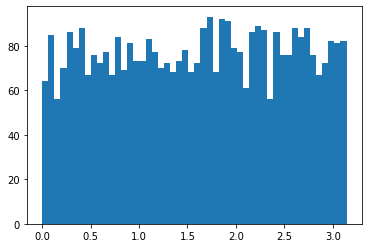

In [5]:
plt.hist(psi,bins=N)
plt.show()


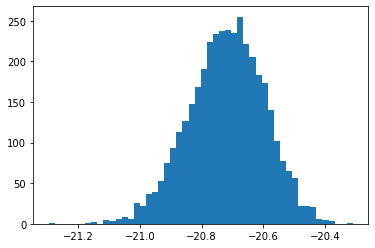

In [6]:
A = np.exp(logA)
plt.hist(logA,bins=N)
plt.show()

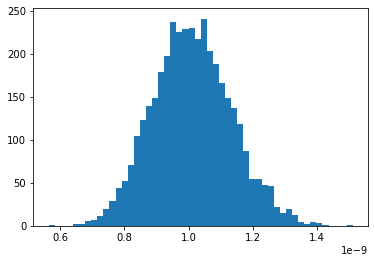

In [7]:
plt.hist(A,bins=N)
plt.show()

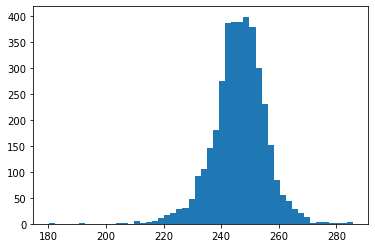

In [8]:
plt.hist(f_t_0,bins=N)
plt.show()

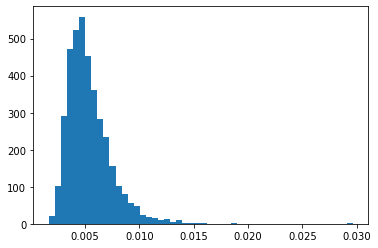

In [9]:
plt.hist(tau_t_0,bins=N)
plt.show()

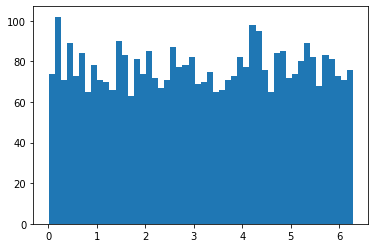

In [10]:
plt.hist(phi_t_0,bins=N)
plt.show()

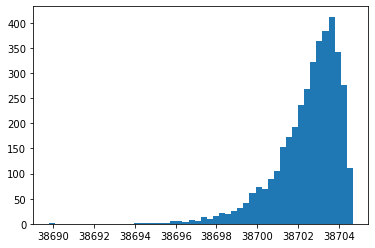

In [11]:
plt.hist(logL,bins=N)
plt.show()

In [12]:
i = [j for j in range(0,len(psi))]

In [13]:
model = np.loadtxt('l2/n2l2m0.dat', unpack=True)

In [14]:
tint = np.linspace(0,1,10000)

In [15]:
a_M = [model[0][i] for i in range(0,10000)]
f_0 = si.interp1d(tint,a_M, kind='linear')

In [16]:
Mwr = [model[1][i] for i in range(0,10000)]
f_1 = si.interp1d(tint,Mwr, kind='linear')
Mwi = [model[2][i] for i in range(0,10000)]
f_2 = si.interp1d(tint,Mwi, kind='linear')
RA = [model[3][i] for i in range(0,10000)]
f_3 = si.interp1d(tint,RA, kind='linear')
IA = [model[4][i] for i in range(0,10000)]
f_4 = si.interp1d(tint,IA, kind='linear')

In [17]:
a_Md = f_0(tdat)
Mwrd = f_1(tdat)
Mtaud = f_2(tdat)

In [18]:
M_d = [Mwrd[i]/f_t_0[i] for i in range(0,3853)]

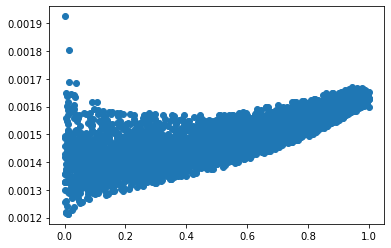

In [19]:
plt.scatter(tdat,M_d)
plt.show()

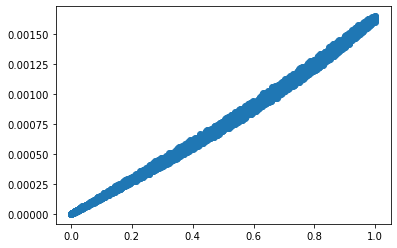

In [20]:
a = [a_Md[i]*M_d[i] for i in range(0,3853)]
plt.scatter(tdat,a)
plt.show()

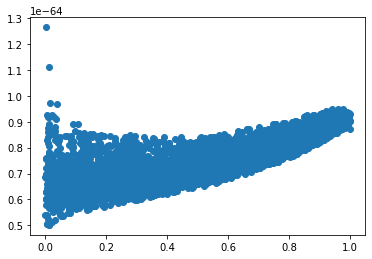

In [21]:
G = 6.67 * (10**(-11))
c = 9 * (10**9)
area = [0 for i in range(0,3853)]
for i in range(0,3853):
    temp = 8*np.pi*(((G*M_d[i])/(c**2))**2)*(1+((1-(a[i]**2))**(1/2)))
    area[i] = temp
plt.scatter(tdat,area)
plt.show()

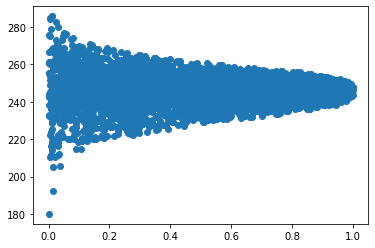

In [22]:
plt.scatter(tdat,f_t_0)
plt.show()

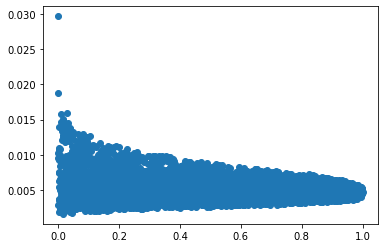

In [23]:
plt.scatter(tdat,tau_t_0)
plt.show()